## Problem Statment: Whether the client has subscribed a term deposit or not 
    Binomial ("yes" or "no")
    Output variable -> y

In [1]:
#librarires import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score

In [85]:
bank = pd.read_csv("bank-full_new.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [86]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [87]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [88]:
0 in bank

False

In [26]:
reports = pp.ProfileReport(bank)
reports.to_widgets()

In [221]:
#Have considerd only these varibles while building model
bank_1 = bank[['age','balance','campaign','day','contact','duration','poutcome','y']] 
bank_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   campaign  45211 non-null  int64 
 3   day       45211 non-null  int64 
 4   contact   45211 non-null  object
 5   duration  45211 non-null  int64 
 6   poutcome  45211 non-null  object
 7   y         45211 non-null  object
dtypes: int64(5), object(3)
memory usage: 2.8+ MB


In [222]:
bank_1.head()

,age,balance,campaign,day,contact,duration,poutcome,y
0,58,2143,1,5,unknown,261,unknown,no
1,44,29,1,5,unknown,151,unknown,no
2,33,2,1,5,unknown,76,unknown,no
3,47,1506,1,5,unknown,92,unknown,no
4,33,1,1,5,unknown,198,unknown,no


In [223]:
bank_1['y'].value_counts()
#bank_1['contact'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [224]:
#mapping y col values 0 for no and 1 for yes
bank_1['y_outcome'] = bank_1.y.map({'no': 0,'yes':1})
bank_1 = pd.get_dummies(bank_1,columns = ['contact'])
bank_1 = pd.get_dummies(bank_1,columns = ['poutcome'])
bank_1.head()

<ipython-input-224-ba8ae8c74a41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_1['y_outcome'] = bank_1.y.map({'no': 0,'yes':1})


,age,balance,campaign,day,duration,y,y_outcome,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,5,261,no,0,0,0,1,0,0,0,1
1,44,29,1,5,151,no,0,0,0,1,0,0,0,1
2,33,2,1,5,76,no,0,0,0,1,0,0,0,1
3,47,1506,1,5,92,no,0,0,0,1,0,0,0,1
4,33,1,1,5,198,no,0,0,0,1,0,0,0,1


In [225]:
bank_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   balance            45211 non-null  int64 
 2   campaign           45211 non-null  int64 
 3   day                45211 non-null  int64 
 4   duration           45211 non-null  int64 
 5   y                  45211 non-null  object
 6   y_outcome          45211 non-null  int64 
 7   contact_cellular   45211 non-null  uint8 
 8   contact_telephone  45211 non-null  uint8 
 9   contact_unknown    45211 non-null  uint8 
 10  poutcome_failure   45211 non-null  uint8 
 11  poutcome_other     45211 non-null  uint8 
 12  poutcome_success   45211 non-null  uint8 
 13  poutcome_unknown   45211 non-null  uint8 
dtypes: int64(6), object(1), uint8(7)
memory usage: 2.7+ MB


In [226]:
Y = bank_1.iloc[:,6]
X = pd.concat([bank_1.iloc[:,:5],bank_1.iloc[:,7:]],axis=1)

In [228]:
#Model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [231]:
#confusion matrix
cmatrix = confusion_matrix(Y,pred)
cmatrix
#1's-1's 39076
#0's-0's 1347
#1's - 0's 846
#0's-1's 3942


array([[39076,   846],
       [ 3942,  1347]], dtype=int64)

In [232]:
accuracy_score(Y,pred)
# accuracy of the predicted value is 89%

0.8940965694189467

In [233]:
print(classification_report(Y,pred))

# Acuracy of model is 89% predicting that a person not opting atenory(1)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.61      0.25      0.36      5289

    accuracy                           0.89     45211
   macro avg       0.76      0.62      0.65     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

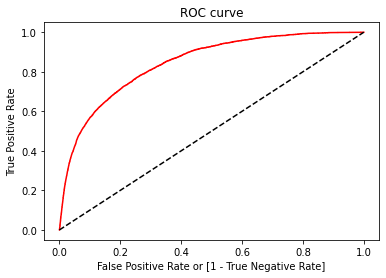

In [234]:
#ROC method
(fpr,tpr,_) = roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color ='red')
plt.plot([0,1],[0,1],'k--')
plt.title("ROC curve")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [206]:
auc = roc_auc_score(Y,pred)
auc

0.6167441002297077

## Predicting Values

In [229]:
pred = classifier.predict(X)# predicting values

In [230]:
listOfDetails = pd.DataFrame({"Actual Values":Y,"Predicted Values":pred})
listOfDetails

,Actual Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,1
45209,0,0
